## Lab: Backprop method
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid
* Add moments rule to learning equation


In [0]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2



In [4]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime

        # self.activation = tanh
        # self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        self.errors = []
        self.epochs = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            #print('error:', error)
            self.errors.append(error[0])
            self.epochs.append(k)
            deltas = [error * self.activation_prime(a[-1])]

            # we have to start at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

[[-0.44112659 -0.42328374 -0.03029819]
 [ 0.2866378   0.75030165 -0.12677578]
 [-0.68173099 -0.62252103  0.6475196 ]]
[[ 0.99370225]
 [ 0.29433994]
 [-0.43580839]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.48000795]
[0 1] [0.48975619]
[1 0] [0.48906295]
[1 1] [0.49441271]


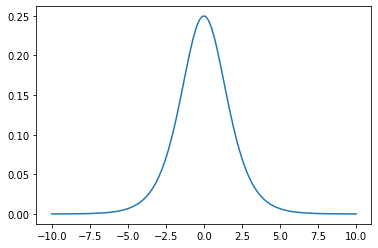

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10.0,10.0,100)
sig = sigmoid_prime(x)
plt.plot(x,sig)

1.Plot the error


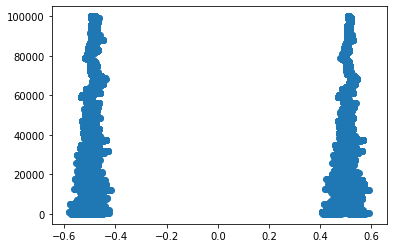

In [7]:
er = nn.errors
e = nn.epochs
#print(e)
plt.figure(2)
plt.scatter(er, e, marker= 'o')
plt.show()

2. Xor problem with sigmoid

In [8]:
class Layer:

    def __init__(self, dim, id, act, act_prime, isoutputLayer = False):
        self.weight = 2 * np.random.random(dim) - 1
        self.delta = None
        self.A = None
        self.activation = act
        self.activation_prime = act_prime
        self.isoutputLayer = isoutputLayer
        self.id = id


    def forward(self, x):
        z = np.dot(x, self.weight)
        self.A = self.activation(z)
        self.dZ = np.atleast_2d(self.activation_prime(z));

        return self.A

    def backward(self, y, rightLayer):
        if self.isoutputLayer:
            error = self.A - y
            self.delta = np.atleast_2d(error * self.dZ)
        else:
            self.delta = np.atleast_2d(
                np.dot(rightLayer.delta, rightLayer.weight.T)
                * self.dZ)
        return self.delta

    def update(self, learning_rate, left_a):
        a = np.atleast_2d(left_a)
        d = np.atleast_2d(self.delta)
        ad = a.T.dot(d)
        self.weight -= learning_rate * ad


class NeuralNetwork:

    def __init__(self, layersDim, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime
        elif activation == 'relu':
            self.activation = relu
            self.activation_prime = relu_prime

        self.layers = []
        for i in range(1, len(layersDim) - 1):
            dim = (layersDim[i - 1] + 1, layersDim[i] + 1)
            self.layers.append(Layer(dim, i, self.activation, self.activation_prime))

        dim = (layersDim[i] + 1, layersDim[i + 1])
        self.layers.append(Layer(dim, len(layersDim) - 1, self.activation, self.activation_prime, True))

    def fit(self, X, y, learning_rate=0.1, epochs=10000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)


        for k in range(epochs):


            a=X

            for l in range(len(self.layers)):
                a = self.layers[l].forward(a)


            delta = self.layers[-1].backward(y, None)

            for l in range(len(self.layers) - 2, -1, -1):
                delta = self.layers[l].backward(delta, self.layers[l+1])



            a = X
            for layer in self.layers:
                layer.update(learning_rate, a)
                a = layer.A

    def predict(self, x):
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.layers)):
            a = self.layers[l].forward(a)
        return a



if __name__ == '__main__':

    X = np.array([ [0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1] ])

    y = np.array([[0, 1, 1, 0]]).T


    #  sigmoid
    nn = NeuralNetwork([2, 3, 4, 1], activation='sigmoid')

    nn.fit(X, y, learning_rate=0.3, epochs=20000)

    print("\n\nResult with sigmoid")
    for e in X:
        print(e, nn.predict(e))




Result with sigmoid
[0 0] [0.00590008]
[0 1] [0.99269759]
[1 0] [0.99262202]
[1 1] [0.00925827]
